In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras import backend as K

/home/grzegorz/miniconda3/envs/gk_py/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


7291
256
256
8.0
(7291, 16, 16)
x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


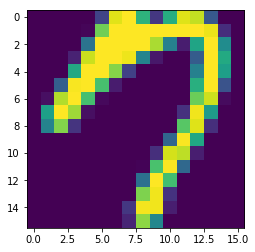

In [13]:
test_txt = 'data/zip_test.txt'
train_txt = 'data/zip_train.txt'
# train_raw = np.loadtxt(train_txt, delimiter=',', usecols=(0, 2), unpack=True)
train_raw = np.loadtxt(train_txt)
test_raw = np.loadtxt(test_txt)

train_lab = train_raw[:, 0]
train_raw = train_raw[:, 1:]

test_lab = test_raw[:, 0]
test_raw = test_raw[:, 1:]

print(train_lab.size)
print(train_raw[0].size)
print(len(train_raw[4]))

# Cleaning the data
train_mat = list()
for ith in train_raw:
    image = np.resize(ith,(16,16))
    train_mat.append(image)
train_mat = np.array(train_mat)

test_mat = list()
for ith in test_raw:
    image = np.resize(ith,(16,16))
    test_mat.append(image)
test_mat = np.array(test_mat)

idn = 110
print(train_lab[idn])
mgplot = plt.imshow(train_mat[10])
print(train_mat.shape)

batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 16, 16

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_mat.reshape(train_mat.shape[0], img_rows, img_cols, 1)
x_test = test_mat.reshape(test_mat.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_lab.astype('int'), num_classes)
y_test = keras.utils.to_categorical(test_lab.astype('int'), num_classes)

In [ ]:
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Dense(32, 
                 activation='relu',
                 input_shape=input_shape))
model.add(Dense(64, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_1 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_acc.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_loss.jpg')
plt.show()

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
5376/7291 [=====================>........] - ETA: 2s - loss: 1.6608 - acc: 0.5995

Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 45s 6ms/step - loss: 2.2868 - acc: 0.1557 - val_loss: 2.2469 - val_acc: 0.1789
Epoch 2/6
7291/7291 [==============================] - 39s 5ms/step - loss: 2.1584 - acc: 0.2284 - val_loss: 1.8560 - val_acc: 0.4340
Epoch 3/6
7291/7291 [==============================] - 52s 7ms/step - loss: 1.2763 - acc: 0.6828 - val_loss: 0.9169 - val_acc: 0.7678
Epoch 4/6
7291/7291 [==============================] - 37s 5ms/step - loss: 0.6744 - acc: 0.8388 - val_loss: 0.6703 - val_acc: 0.8022
Epoch 5/6
7291/7291 [==============================] - 34s 5ms/step - loss: 0.5005 - acc: 0.8678 - val_loss: 0.5720 - val_acc: 0.8261
Epoch 6/6
7291/7291 [==============================] - 42s 6ms/step - loss: 0.4151 - acc: 0.8834 - val_loss: 0.5103 - val_acc: 0.8426
Test loss: 0.5103211684730674
Test accuracy: 0.8425510711615277


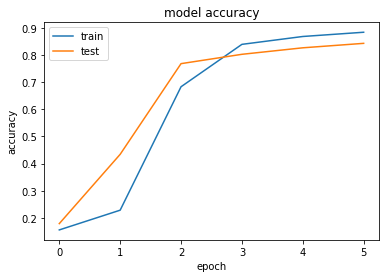

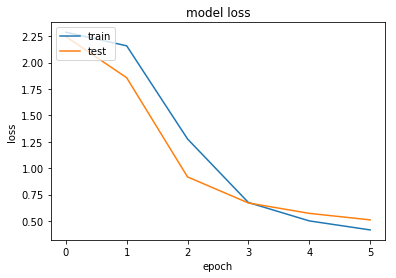

In [12]:
# (2) Locally connected  with  no  weights shared inthe
# first  three  layers,  where  each  input/neuron  is 
# connected to the neurons in a local neighbor in the next layer

model = Sequential()
model.add(LocallyConnected2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_2 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_2.history['acc'])
plt.plot(task_I_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_acc.jpg')
plt.show()

plt.plot(task_I_2.history['loss'])
plt.plot(task_I_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_loss.jpg')
plt.show()

In [8]:
# (3) Locally connected with weights shared in the first three layers
# (i.e., a convolutional neural network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Dense(64, activation='sigmoid'))
model.add(Flatten())
# model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_3 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_3.history['acc'])
plt.plot(task_I_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_acc.jpg')
plt.show()

plt.plot(task_I_3.history['loss'])
plt.plot(task_I_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_loss.jpg')
plt.show()